In [1]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import yfinance as yf

In [16]:
# Get a list of all S&P 500 tickers
from yahoo_fin import stock_info as si
stocks_list = si.tickers_sp500()
stocks_list

['A',
 'AAL',
 'AAP',
 'AAPL',
 'ABBV',
 'ABC',
 'ABT',
 'ACGL',
 'ACN',
 'ADBE',
 'ADI',
 'ADM',
 'ADP',
 'ADSK',
 'AEE',
 'AEP',
 'AES',
 'AFL',
 'AIG',
 'AIZ',
 'AJG',
 'AKAM',
 'ALB',
 'ALGN',
 'ALK',
 'ALL',
 'ALLE',
 'AMAT',
 'AMCR',
 'AMD',
 'AME',
 'AMGN',
 'AMP',
 'AMT',
 'AMZN',
 'ANET',
 'ANSS',
 'AON',
 'AOS',
 'APA',
 'APD',
 'APH',
 'APTV',
 'ARE',
 'ATO',
 'ATVI',
 'AVB',
 'AVGO',
 'AVY',
 'AWK',
 'AXP',
 'AZO',
 'BA',
 'BAC',
 'BALL',
 'BAX',
 'BBWI',
 'BBY',
 'BDX',
 'BEN',
 'BF-B',
 'BG',
 'BIIB',
 'BIO',
 'BK',
 'BKNG',
 'BKR',
 'BLK',
 'BMY',
 'BR',
 'BRK-B',
 'BRO',
 'BSX',
 'BWA',
 'BXP',
 'C',
 'CAG',
 'CAH',
 'CARR',
 'CAT',
 'CB',
 'CBOE',
 'CBRE',
 'CCI',
 'CCL',
 'CDAY',
 'CDNS',
 'CDW',
 'CE',
 'CEG',
 'CF',
 'CFG',
 'CHD',
 'CHRW',
 'CHTR',
 'CI',
 'CINF',
 'CL',
 'CLX',
 'CMA',
 'CMCSA',
 'CME',
 'CMG',
 'CMI',
 'CMS',
 'CNC',
 'CNP',
 'COF',
 'COO',
 'COP',
 'COST',
 'CPB',
 'CPRT',
 'CPT',
 'CRL',
 'CRM',
 'CSCO',
 'CSGP',
 'CSX',
 'CTAS',
 'CTLT',
 'CTR

In [14]:
# Download data for all tickers and store it in a dictionary
data = {}
for ticker in tickers:
    data[ticker] = yf.download(ticker, start='2022-01-01', end='2023-03-30')['Adj Close']

# Convert dictionary to a pandas dataframe
df = pd.DataFrame(data)

NameError: name 'tickers' is not defined

In [17]:
symbols = ['AAPL', 'MSFT', 'AMZN', 'GOOG', 'META']
data = yf.download(stocks_list, start='2022-01-01', end='2023-03-30')['Adj Close']

[*********************100%***********************]  503 of 503 completed


In [18]:
print(type(data))

<class 'pandas.core.frame.DataFrame'>


In [19]:
data.head()

,A,AAL,AAP,AAPL,ABBV,ABC,ABT,ACGL,ACN,ADBE,...,WYNN,XEL,XOM,XRAY,XYL,YUM,ZBH,ZBRA,ZION,ZTS
Date,,,,,,,,,,,,,,,,,,,,,
2022-01-03 00:00:00-05:00,155.457169,18.750000,228.551392,180.683853,129.114441,130.573685,136.129013,44.549999,400.092926,564.369995,...,87.769997,65.571884,60.648853,56.082111,115.033981,133.341431,124.095253,583.900024,62.032288,231.780838
2022-01-04 00:00:00-05:00,150.201736,19.020000,228.812012,178.390701,128.866531,129.333130,132.927490,45.130001,397.233734,554.000000,...,87.489998,65.986900,62.930107,56.368000,116.254288,134.054382,125.354179,587.599976,63.799389,222.956467
2022-01-05 00:00:00-05:00,147.628693,18.680000,228.232864,173.645523,129.543472,130.455536,132.330261,44.599998,390.238159,514.429993,...,84.250000,66.633553,63.712788,55.461067,114.669853,132.355026,124.940948,558.179993,63.944244,214.478714
2022-01-06 00:00:00-05:00,148.145279,18.570000,233.252151,170.746811,128.933273,128.437164,132.310669,44.860001,371.393433,514.119995,...,84.639999,66.112366,65.211357,55.421635,114.512405,133.722305,123.903053,555.159973,66.570763,215.330460
2022-01-07 00:00:00-05:00,144.201233,19.280001,229.815872,170.915558,128.599579,131.065964,132.721878,45.070000,364.270142,510.700012,...,84.550003,66.691444,65.745872,55.599075,113.597168,132.188995,123.153458,530.859985,67.681244,209.061295


In [20]:
# Calculate the annual mean returns and variances
daily_returns = data.pct_change() # Computes the percentage change from the immediately previous row
annual_mean_returns = daily_returns.mean() * 252 # 252 trading days in a year
annual_return_variance = daily_returns.var() * 252

In [21]:
# create new dataframe
df2 = pd.DataFrame(data.columns, columns=['Stock_Symbols'])
df2['Variances'] = annual_return_variance.values
df2['Returns'] = annual_mean_returns.values

# show the data
df2

,Stock_Symbols,Variances,Returns
0,A,0.114847,-0.064657
1,AAL,0.287564,-0.074102
2,AAP,0.127371,-0.474654
3,AAPL,0.114959,-0.037751
4,ABBV,0.047600,0.188029
...,...,...,...
498,YUM,0.051056,-0.005144
499,ZBH,0.080133,0.057055
500,ZBRA,0.204013,-0.448478
501,ZION,0.220759,-0.445794


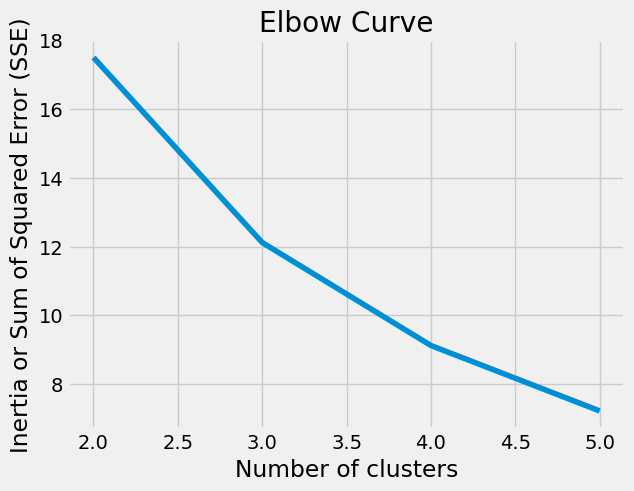

In [22]:
# Using the elbow method to group the stocks
# elbow method is a heuristic
# knee of the curve gives the cut-off point or number of clusters

# Get and store the annual returns and annual variances
X = df2[['Returns','Variances']].values
inertia_list = [] # empty list

# number of clusters should always be less than or equal to the number of samples
# Loop through 2 to 6 clusters
for k in range(2,6):
    #Create and train the model
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X)

    #Append kmeans inertia to the list
    inertia_list.append(kmeans.inertia_) # gives us sum of squared errors or residual

# plot the data
plt.plot(range(2,6), inertia_list)
plt.title('Elbow Curve')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia or Sum of Squared Error (SSE)')
plt.show()

So, we use 4 clusters

In [23]:
# Get and show the labels / groups for each stock in our dataset
kmeans = KMeans(n_clusters=3).fit(X)
labels = kmeans.labels_
labels

array([0, 0, 2, 0, 0, 0, 2, 1, 2, 2, 0, 0, 0, 2, 0, 0, 0, 0, 0, 2, 0, 2,
       0, 2, 2, 0, 0, 0, 0, 2, 0, 0, 0, 2, 2, 1, 0, 0, 0, 1, 0, 0, 2, 2,
       0, 1, 2, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 0, 0, 0, 0, 0, 1, 2, 0, 0,
       1, 2, 0, 0, 0, 0, 0, 0, 2, 2, 0, 1, 0, 0, 0, 0, 2, 2, 2, 2, 0, 0,
       2, 1, 0, 2, 0, 0, 2, 0, 0, 0, 0, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 1,
       0, 1, 0, 2, 2, 0, 0, 0, 0, 0, 2, 1, 2, 1, 2, 1, 2, 2, 0, 0, 0, 0,
       0, 0, 0, 0, 2, 2, 2, 0, 0, 0, 2, 0, 0, 0, 2, 1, 2, 0, 0, 2, 2, 0,
       2, 0, 2, 0, 2, 0, 1, 1, 2, 0, 2, 1, 0, 2, 0, 0, 2, 0, 2, 0, 0, 2,
       2, 2, 1, 0, 0, 0, 0, 0, 2, 1, 2, 0, 2, 0, 0, 0, 0, 2, 2, 1, 0, 0,
       0, 1, 1, 2, 0, 1, 0, 0, 2, 2, 2, 2, 0, 2, 2, 0, 1, 1, 2, 2, 0, 2,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 2, 0, 0, 2, 2, 0, 2,
       2, 2, 0, 0, 2, 0, 0, 2, 0, 0, 2, 0, 0, 2, 0, 0, 0, 0, 0, 0, 2, 2,
       0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 2, 0, 0, 0, 1, 1, 2, 0, 2, 2, 2,
       1, 1, 0, 2, 0, 2, 0, 2, 0, 0, 1, 0, 0, 2, 0,

In [24]:
df2['Cluster_Labels'] = labels
df2

,Stock_Symbols,Variances,Returns,Cluster_Labels
0,A,0.114847,-0.064657,0
1,AAL,0.287564,-0.074102,0
2,AAP,0.127371,-0.474654,2
3,AAPL,0.114959,-0.037751,0
4,ABBV,0.047600,0.188029,0
...,...,...,...,...
498,YUM,0.051056,-0.005144,0
499,ZBH,0.080133,0.057055,0
500,ZBRA,0.204013,-0.448478,2
501,ZION,0.220759,-0.445794,2


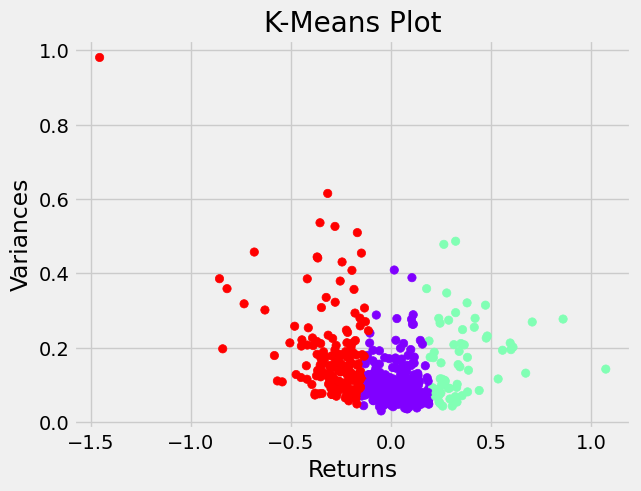

In [25]:
# Plot and show the different clusters
plt.scatter(X[:,0],X[:,1],c=labels, cmap = 'rainbow')
plt.title('K-Means Plot')
plt.xlabel('Returns')
plt.ylabel('Variances')
plt.show()

In [26]:
# Create a function to build a simple diversed portfolio
def diversed_port():
    for i in range(0,4):
        symbol = df2[df2['Cluster_Labels'] == i].head(1)
        print(symbol[['Stock_Symbols', 'Cluster_Labels']])

In [27]:
diversed_port()

  Stock_Symbols  Cluster_Labels
0             A               0
  Stock_Symbols  Cluster_Labels
7          ACGL               1
  Stock_Symbols  Cluster_Labels
2           AAP               2
Empty DataFrame
Columns: [Stock_Symbols, Cluster_Labels]
Index: []


I did not do any data analysis, this is purely based off heuristics